In [1]:
# import statements

from __future__ import print_function
import numpy as np

import csv
import os,random

# The code is run on a CPU

from keras.models import Model
from keras.layers import Input, Conv1D, LSTM, Dense, Dropout, Activation, Flatten, concatenate, UpSampling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import *
from keras.layers import Lambda

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

In [2]:
timesteps = 240  # number of timesteps
nr = 90   # number of repetitions
n_dim = 117  # dimension of the data sequences

In [3]:
import DataViconLoad   # Import the data
Correct_data, Correct_label, Incorrect_data, Incorrect_label = DataViconLoad.load_data()

# Print the size of the data 
print(Correct_data.shape, 'correct sequences')
print(Correct_label.shape, 'correct labels')
print(Incorrect_data.shape, 'incorrect sequences')
print(Incorrect_label.shape, 'incorrect labels')

(90, 240, 117) correct sequences
(90, 1) correct labels
(90, 240, 117) incorrect sequences
(90, 1) incorrect labels


In [4]:
# Split the data into training and validation sets
# Training set: 70%
# Validation set: 30%

# Sample random indices
trainidx1 = random.sample(range(0,Correct_data.shape[0]),int(nr*0.7))
trainidx2 = random.sample(range(0,Incorrect_data.shape[0]),int(nr*0.7))
valididx1 = np.setdiff1d(np.arange(0,nr,1),trainidx1)
valididx2 = np.setdiff1d(np.arange(0,nr,1),trainidx2)

# Training set: data and labels
train_x = np.concatenate((Correct_data[trainidx1,:,:],Incorrect_data[trainidx2,:,:]))
print(train_x.shape, 'training data')
train_y = np.concatenate((np.squeeze(Correct_label[trainidx1]),np.squeeze(Incorrect_label[trainidx2])))
print(train_y.shape, 'training labels')

# Validation set: data and labels
valid_x = np.concatenate((Correct_data[valididx1,:,:],Incorrect_data[valididx2,:,:]))
print(valid_x.shape, 'validation data')
valid_y = np.concatenate((np.squeeze(Correct_label[valididx1]),np.squeeze(Incorrect_label[valididx2])))
print(valid_y.shape, 'validation labels')

(124, 240, 117) training data
(124,) training labels
(56, 240, 117) validation data
(56,) validation labels


In [5]:
from tensorflow.keras import layers, models

In [40]:
model = models.Sequential()
model.add(layers.Conv1D(filters=8096, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=1, input_shape=(240,117)))
model.add(layers.Conv1D(filters=4046, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=2))
model.add(layers.Conv1D(filters=2048, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=4))
model.add(layers.Conv1D(filters=1024, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=8))
model.add(layers.Conv1D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=16))
model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu', dilation_rate=32))
model.add(layers.Conv1D(filters=128, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Conv1D(filters=56, kernel_size=3, strides=2, padding='same', activation='relu', dilation_rate=1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_92 (Conv1D)          (None, 240, 8096)         2849792   
                                                                 
 conv1d_93 (Conv1D)          (None, 240, 4046)         98273294  
                                                                 
 conv1d_94 (Conv1D)          (None, 240, 2048)         24860672  
                                                                 
 conv1d_95 (Conv1D)          (None, 240, 1024)         6292480   
                                                                 
 conv1d_96 (Conv1D)          (None, 240, 512)          1573376   
                                                                 
 conv1d_97 (Conv1D)          (None, 240, 256)          393472    
                                                                 
 conv1d_98 (Conv1D)          (None, 120, 128)        

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

In [42]:
train_x.shape

(124, 240, 117)

In [43]:
t = now()
    
early_stopping = EarlyStopping(monitor='val_loss', patience = 25)

history = model.fit(train_x, train_y, batch_size=10, epochs=5, verbose=1, 
                validation_data=(valid_x, valid_y), callbacks = [early_stopping])

print('Training time: %s' % (now() - t))

Epoch 1/5
13/13 [==============================] - 310s 24s/step - loss: 0.6948 - val_loss: 0.0289
Epoch 2/5
13/13 [==============================] - 357s 28s/step - loss: 0.1102 - val_loss: 0.0307
Epoch 3/5
13/13 [==============================] - 384s 30s/step - loss: 0.0299 - val_loss: 0.0183
Epoch 4/5
13/13 [==============================] - 382s 29s/step - loss: 0.0229 - val_loss: 0.0197
Epoch 5/5
13/13 [==============================] - 386s 30s/step - loss: 0.0340 - val_loss: 0.0225
Training time: 0:30:19.571133


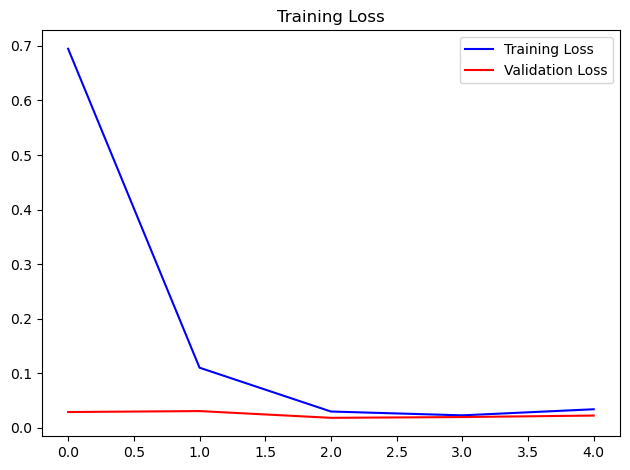

Training loss 0.022856689989566803
Validation loss 0.018312279134988785


In [44]:
# Plot the results
plt.figure(1)
plt.plot(history.history['loss'], 'b', label = 'Training Loss')
plt.title('Training Loss')
plt.plot(history.history['val_loss'], 'r', label = 'Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()
# Print the minimum loss
print("Training loss", np.min(history.history['loss']))
print("Validation loss",np.min(history.history['val_loss']))    

In [45]:
# Plot the prediction of the model for the training and validation sets
pred_train = model.predict(train_x)

pred_test = model.predict(valid_x)



2/2 [==============================] - 36s 16s/step


In [46]:
pred_test

array([[[0.8519993 ]],

       [[0.91461945]],

       [[0.9766018 ]],

       [[0.73217106]],

       [[0.761096  ]],

       [[0.8200037 ]],

       [[0.8399287 ]],

       [[0.83441305]],

       [[0.84682864]],

       [[0.8314147 ]],

       [[0.852175  ]],

       [[0.81290066]],

       [[0.8557101 ]],

       [[0.83110195]],

       [[0.8166839 ]],

       [[0.8305155 ]],

       [[0.9277097 ]],

       [[0.8365491 ]],

       [[0.9000926 ]],

       [[0.8058224 ]],

       [[0.7916324 ]],

       [[0.7214838 ]],

       [[0.7666129 ]],

       [[0.84943604]],

       [[0.9070682 ]],

       [[0.7465234 ]],

       [[0.8143034 ]],

       [[0.8157332 ]],

       [[0.6677782 ]],

       [[0.77229923]],

       [[0.8834032 ]],

       [[0.7755842 ]],

       [[0.8979936 ]],

       [[0.77464074]],

       [[0.83594936]],

       [[0.722768  ]],

       [[0.75116074]],

       [[0.78218186]],

       [[0.93849444]],

       [[0.6963256 ]],

       [[0.7202983 ]],

       [[0.72580

In [47]:
valid_y

array([0.95192, 0.93477, 0.95051, 0.95106, 0.95678, 0.95759, 0.95209,
       0.96055, 0.94099, 0.94108, 0.92885, 0.9278 , 0.93272, 0.93268,
       0.93328, 0.92809, 0.93498, 0.92809, 0.92954, 0.93655, 0.93805,
       0.9574 , 0.95846, 0.94449, 0.94646, 0.95942, 0.96092, 0.94323,
       0.94198, 0.91372, 0.77167, 0.80149, 0.77522, 0.84994, 0.91902,
       0.82511, 0.91952, 0.88083, 0.76309, 0.9012 , 0.90882, 0.9004 ,
       0.91283, 0.87481, 0.94531, 0.89793, 0.91942, 0.82611, 0.90925,
       0.86333, 0.86037, 0.92335, 0.86235, 0.71174, 0.85427, 0.80634])

In [48]:
# Calculate the cumulative deviation and rms deviation for the validation set
test_dev = abs(np.squeeze(pred_test)-valid_y)
# Cumulative deviation
mean_abs_dev = np.mean(test_dev)
# RMS deviation
rms_dev = sqrt(mean_squared_error(pred_test, valid_y))
print('Mean absolute deviation:', mean_abs_dev)
print('RMS deviation:', rms_dev)

ValueError: Found array with dim 3. None expected <= 2.